<a href="https://colab.research.google.com/github/Takouabelwafa/Machine_Learning/blob/main/AccuraccyModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

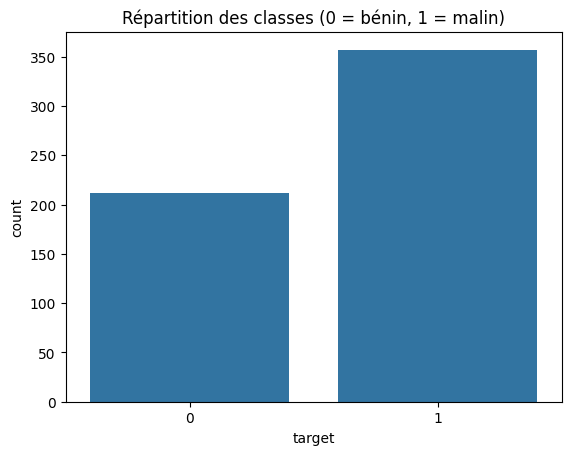

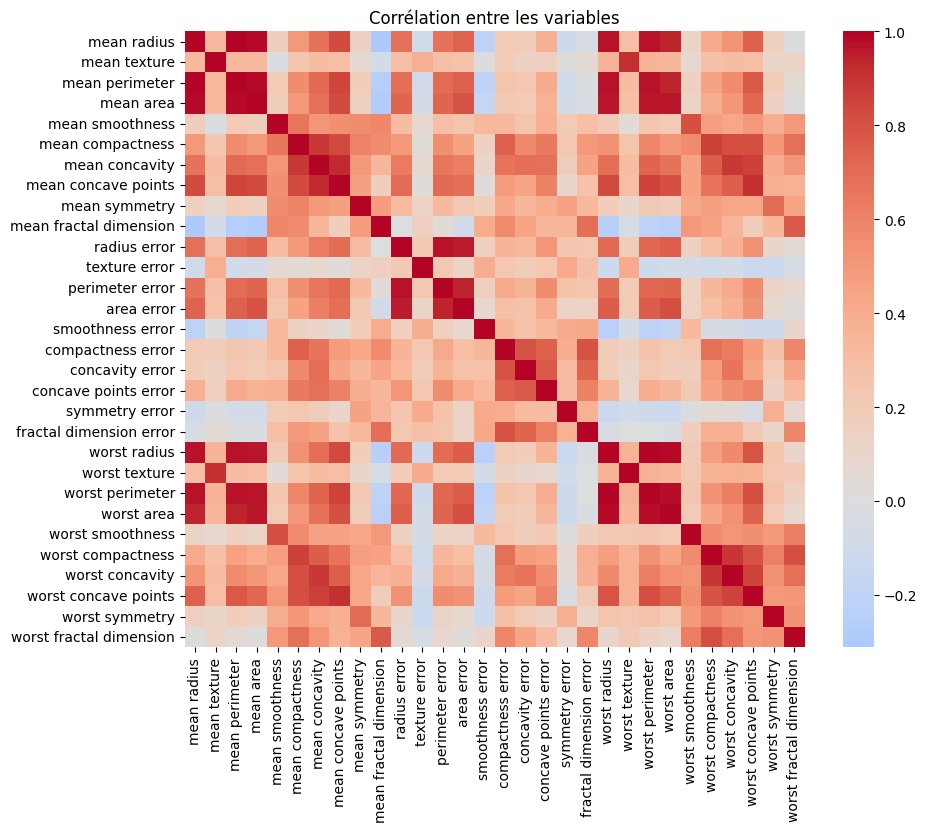

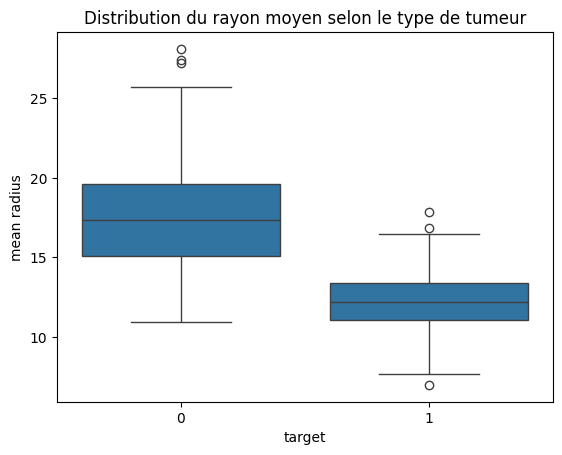

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy : 0.96
Precision : 0.95
Recall : 0.99
F1-score : 0.97

=== Rapport de classification ===
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



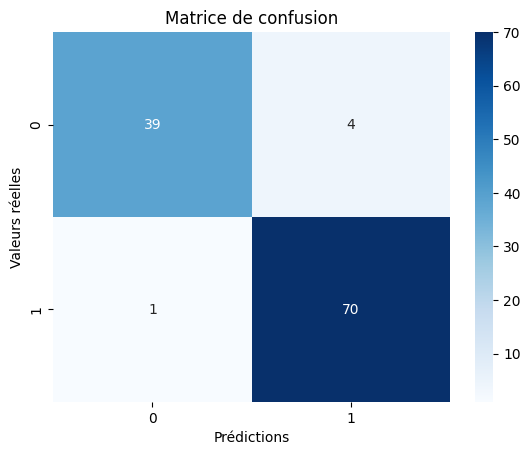

In [28]:
# Étape 1 : Importer les bibliothèques nécessaires
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Charger le dataset de classification (Cancer du sein)
df = load_breast_cancer(as_frame=True)
df = data.frame

# 1️⃣ Séparer les features (X) et la cible (y)
X = df.drop(columns=['target'])  # Toutes les colonnes sauf la cible
y = df['target']                 # La colonne cible

# 2️⃣ Diviser les données en train et test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
import seaborn as sns
import matplotlib.pyplot as plt

# Vérifier l'équilibre des classes
sns.countplot(x=y)
plt.title("Répartition des classes (0 = bénin, 1 = malin)")
plt.show()

# Visualiser la corrélation entre les variables
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), cmap="coolwarm", center=0)
plt.title("Corrélation entre les variables")
plt.show()

# Exemple : relation entre une variable et la cible
sns.boxplot(x=y, y=X['mean radius'])
plt.title("Distribution du rayon moyen selon le type de tumeur")
plt.show()

modele=LogisticRegression()
modele.fit(X_train,y_train)
y_pred=modele.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy : {accuracy:.2f}")
print(f"Precision : {precision:.2f}")
print(f"Recall : {recall:.2f}")
print(f"F1-score : {f1:.2f}")

print("\n=== Rapport de classification ===")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Prédictions")
plt.ylabel("Valeurs réelles")
plt.title("Matrice de confusion")
plt.show()

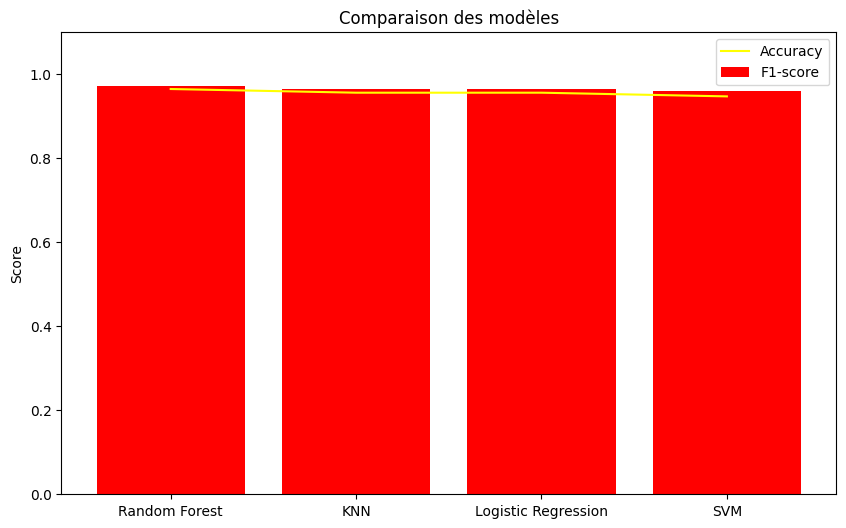

In [30]:
# 📦 Importer les bibliothèques nécessaires
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import pandas as pd

# 🔹 Charger le dataset
data = load_breast_cancer(as_frame=True)
df = data.frame

X = df.drop(columns=['target'])
y = df['target']

# 🔹 Séparer en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Définir les modèles à comparer
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

# 🔹 Évaluer chaque modèle
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append({
        "Modèle": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred)
    })

# 🔹 Créer un tableau des résultats
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="F1-score", ascending=False)
results_df
import matplotlib.pyplot as plt

# Graphique comparatif Accuracy et F1-score
plt.figure(figsize=(10,6))
plt.plot(results_df['Modèle'], results_df['Accuracy'], color="yellow", label='Accuracy')
plt.bar(results_df['Modèle'], results_df['F1-score'], color="red", label='F1-score')
plt.ylabel('Score')
plt.title('Comparaison des modèles')
plt.ylim(0, 1.1)
plt.legend()
plt.show()


In [31]:
from sklearn.model_selection import cross_val_score

# Exemple sur Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Cross-validation sur 5 folds
scores = cross_val_score(rf_model, X, y, cv=5, scoring='f1')
print("Scores F1 sur chaque fold :", scores)
print("F1-score moyen :", scores.mean())


Scores F1 sur chaque fold : [0.93617021 0.95238095 0.98611111 0.97260274 0.9787234 ]
F1-score moyen : 0.9651976840478735
